<a href="https://colab.research.google.com/github/mittushaji25/anomaly_detection/blob/main/notebook/Anomaly_Detection_Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anomaly Detection using Isolation Forest**


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('/content/anomaly_detection/data/Healthcare Providers.csv')
df = pd.DataFrame(data)
display(df.head())

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


## Exploratory Data Analysis (EDA)



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [12]:
df.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


In [14]:
df.dtypes

,0
index,int64
National Provider Identifier,int64
Last Name/Organization Name of the Provider,object
First Name of the Provider,object
Middle Initial of the Provider,object
Credentials of the Provider,object
Gender of the Provider,object
Entity Type of the Provider,object
Street Address 1 of the Provider,object
Street Address 2 of the Provider,object


In [15]:
df.isnull().sum()

,0
index,0
National Provider Identifier,0
Last Name/Organization Name of the Provider,0
First Name of the Provider,4255
Middle Initial of the Provider,29331
Credentials of the Provider,7209
Gender of the Provider,4254
Entity Type of the Provider,0
Street Address 1 of the Provider,0
Street Address 2 of the Provider,59363


### Cleaning

In [17]:
numeric_columns = ['Number of Services', 'Number of Medicare Beneficiaries',
                   'Number of Distinct Medicare Beneficiary/Per Day Services',
                   'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                   'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']


for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [18]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [19]:
non_numeric_columns = ['Last Name/Organization Name of the Provider', 'First Name of the Provider',
                       'Middle Initial of the Provider', 'Credentials of the Provider',
                       'Gender of the Provider', 'Entity Type of the Provider',
                       'Street Address 1 of the Provider', 'Street Address 2 of the Provider',
                       'City of the Provider', 'State Code of the Provider',
                       'Country Code of the Provider', 'Provider Type',
                       'Medicare Participation Indicator', 'Place of Service',
                       'HCPCS Code', 'HCPCS Description', 'HCPCS Drug Indicator']

df[non_numeric_columns] = df[non_numeric_columns].fillna('Unknown')

In [21]:
df[numeric_columns].describe()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,100.574791,69.228576,95.835117,87.455376,190.608753,68.803728,69.373304
std,147.866976,101.694265,142.743380,103.014282,184.542280,90.964802,91.233067
min,11.000000,11.000000,11.000000,0.010000,0.010000,0.008679,0.008679
25%,21.000000,17.000000,20.000000,24.270000,57.647876,19.335228,20.121849
50%,43.000000,32.000000,40.000000,65.095000,146.000000,47.020176,47.841094
75%,103.000000,74.000000,99.000000,111.748125,239.500000,83.960566,83.914863
max,999.000000,999.000000,999.000000,999.848235,999.736842,998.620000,998.775000


In [22]:
df_numeric = df[numeric_columns]

### Scaling

In [23]:
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)

## Isolation Forest Anomaly Model

In [24]:
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(df_numeric_scaled)
print(model.get_params())
df['Anomaly_Scores'] = model.decision_function(df_numeric_scaled)
df['Anomaly'] = model.predict(df_numeric_scaled)

{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


## Visualization

### Box Plot Comparison: Anomalies vs. Normal Data

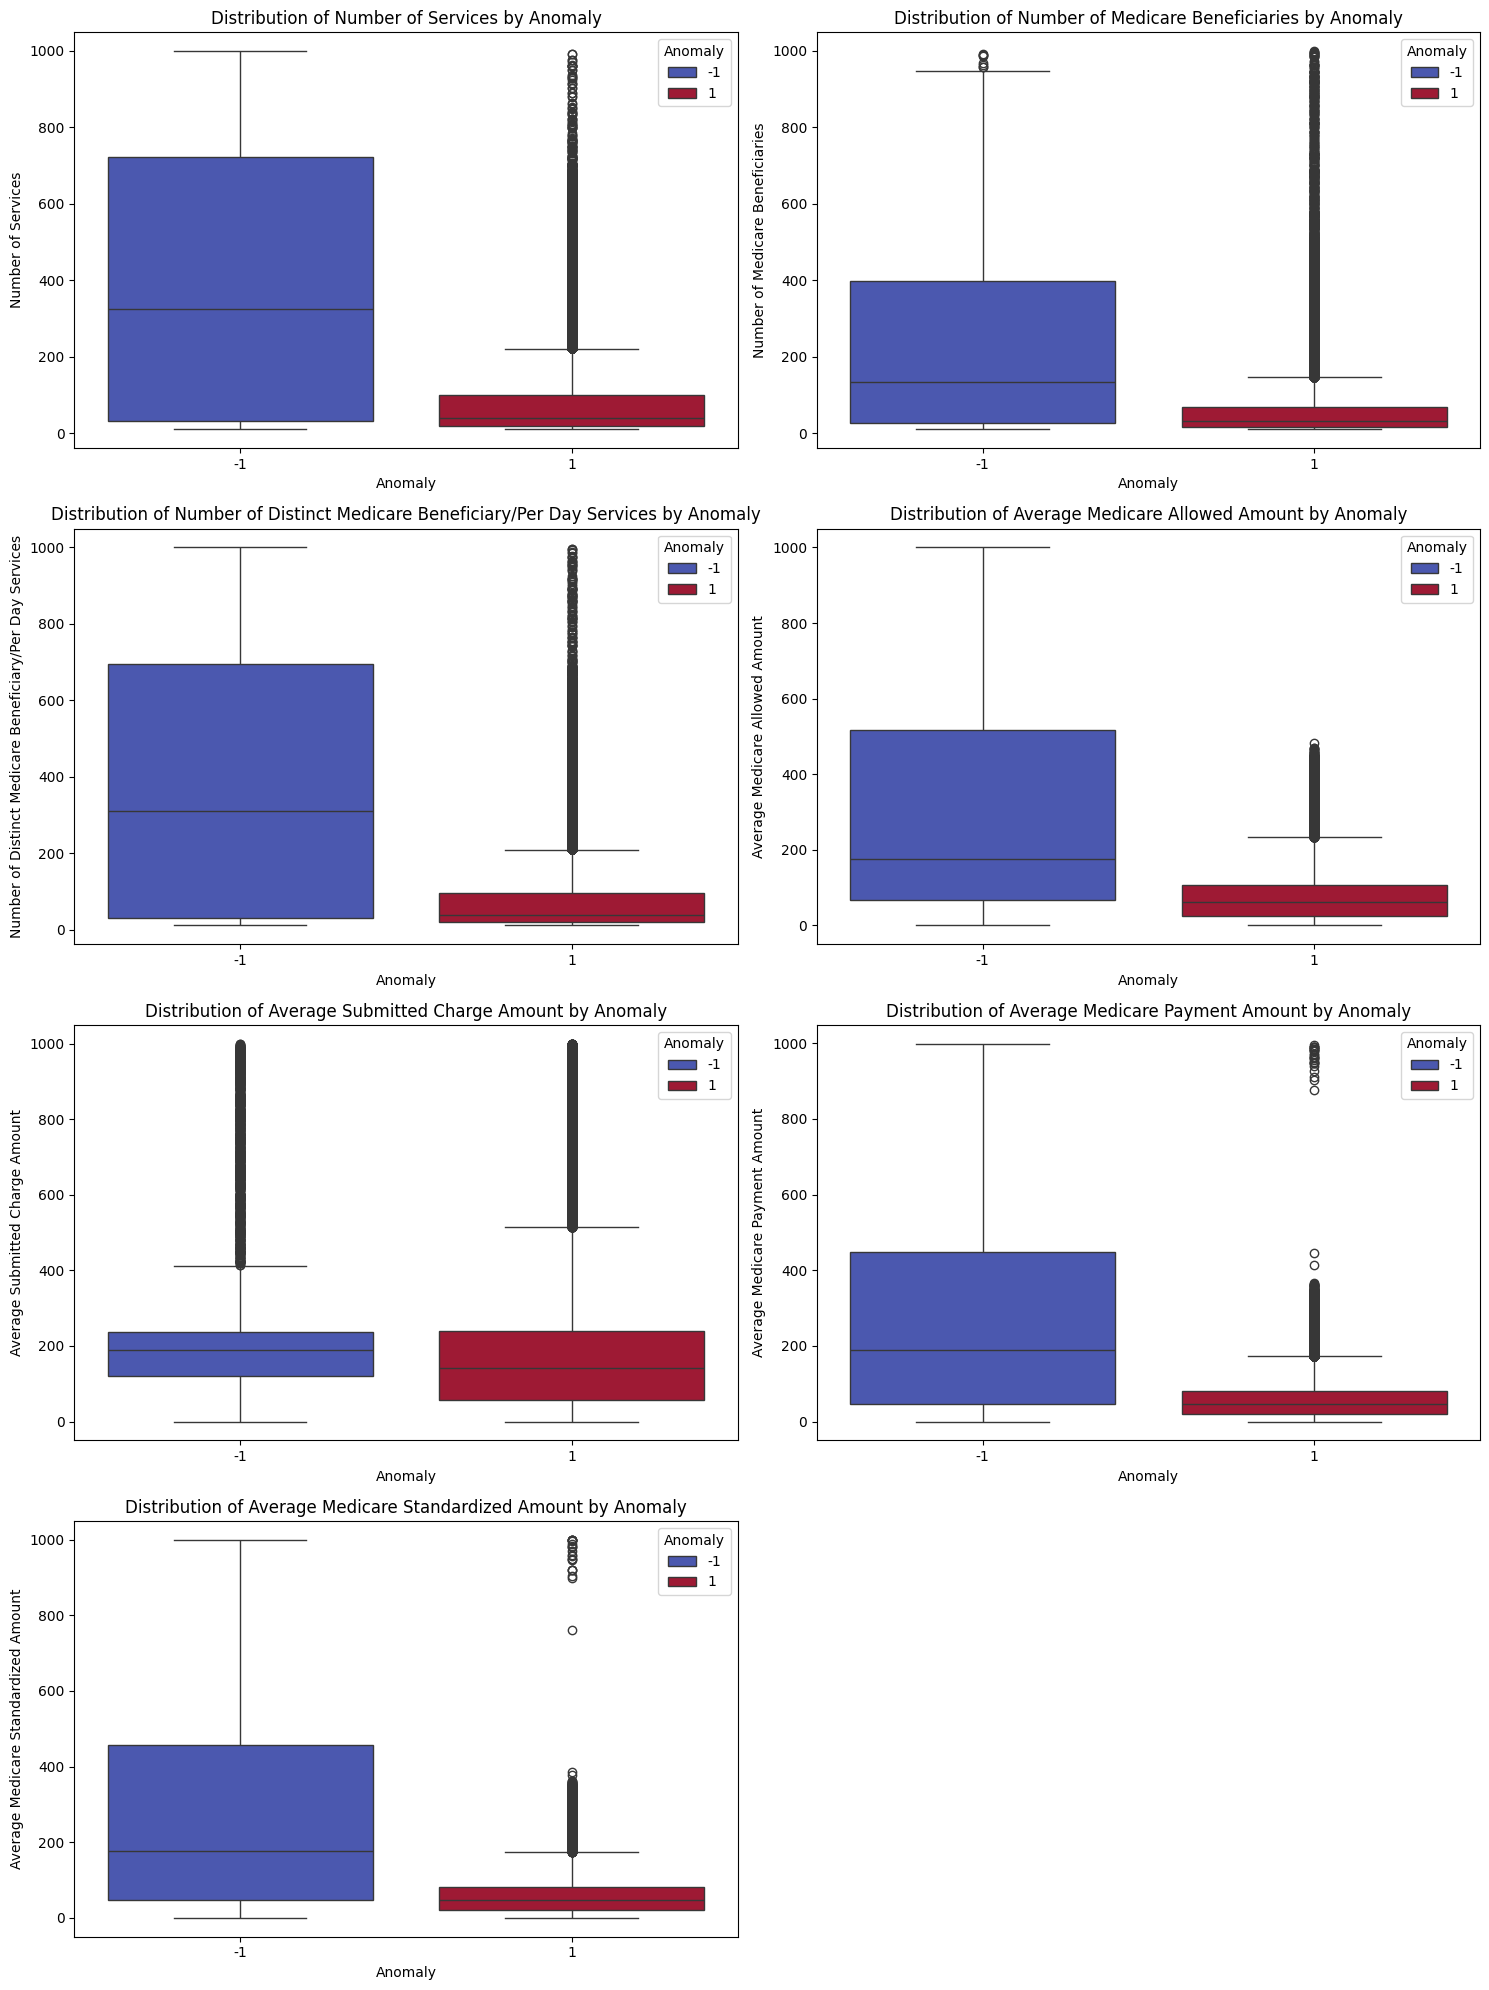

In [25]:
# Box plots of Anomalies vs Normal for all features
num_cols = len(numeric_columns)

nrows = (num_cols + 1) // 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
for i, col in enumerate(numeric_columns):
    row = i // ncols
    col_index = i % ncols
    sns.boxplot(x=df['Anomaly'], y=col, data=df, hue='Anomaly', palette="coolwarm", ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Distribution of {col} by Anomaly')
    axes[row, col_index].set_xlabel('Anomaly')
    axes[row, col_index].set_ylabel(col)

if num_cols % ncols != 0:
    for j in range(num_cols % ncols, ncols):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

- **Number of Service:** Anomalous providers tend to have wider variation and higher service counts, potentially signaling overbilling or unusual service patterns.
- **Number of Medicare Beneficiaries:**	Anomalies show a tighter cluster and lower median, hinting at providers serving fewer but potentially higher-cost patients.
- **Distinct Medicare Beneficiary/Per Day Services:**	Higher median values for anomalies suggest intense service delivery in short timeframes often a red flag in audits.
- **Average Medicare Allowed Amount:**	Noticeable increase in outlier spread for anomalies, these providers are being allowed significantly higher amounts.
- **Average Submitted Charge Amount:**	Elevated medians and outliers among anomalies could indicate inflated or misclassified charges.
- **Average Medicare Payment Amount:**	Payments to anomalous providers diverge more sharply, which may merit deeper investigation.
- **Medicare Standardized Amount:**	Consistently higher dispersion suggests systemic deviations in how standardized charges are applied.

### Correlation Heatmap

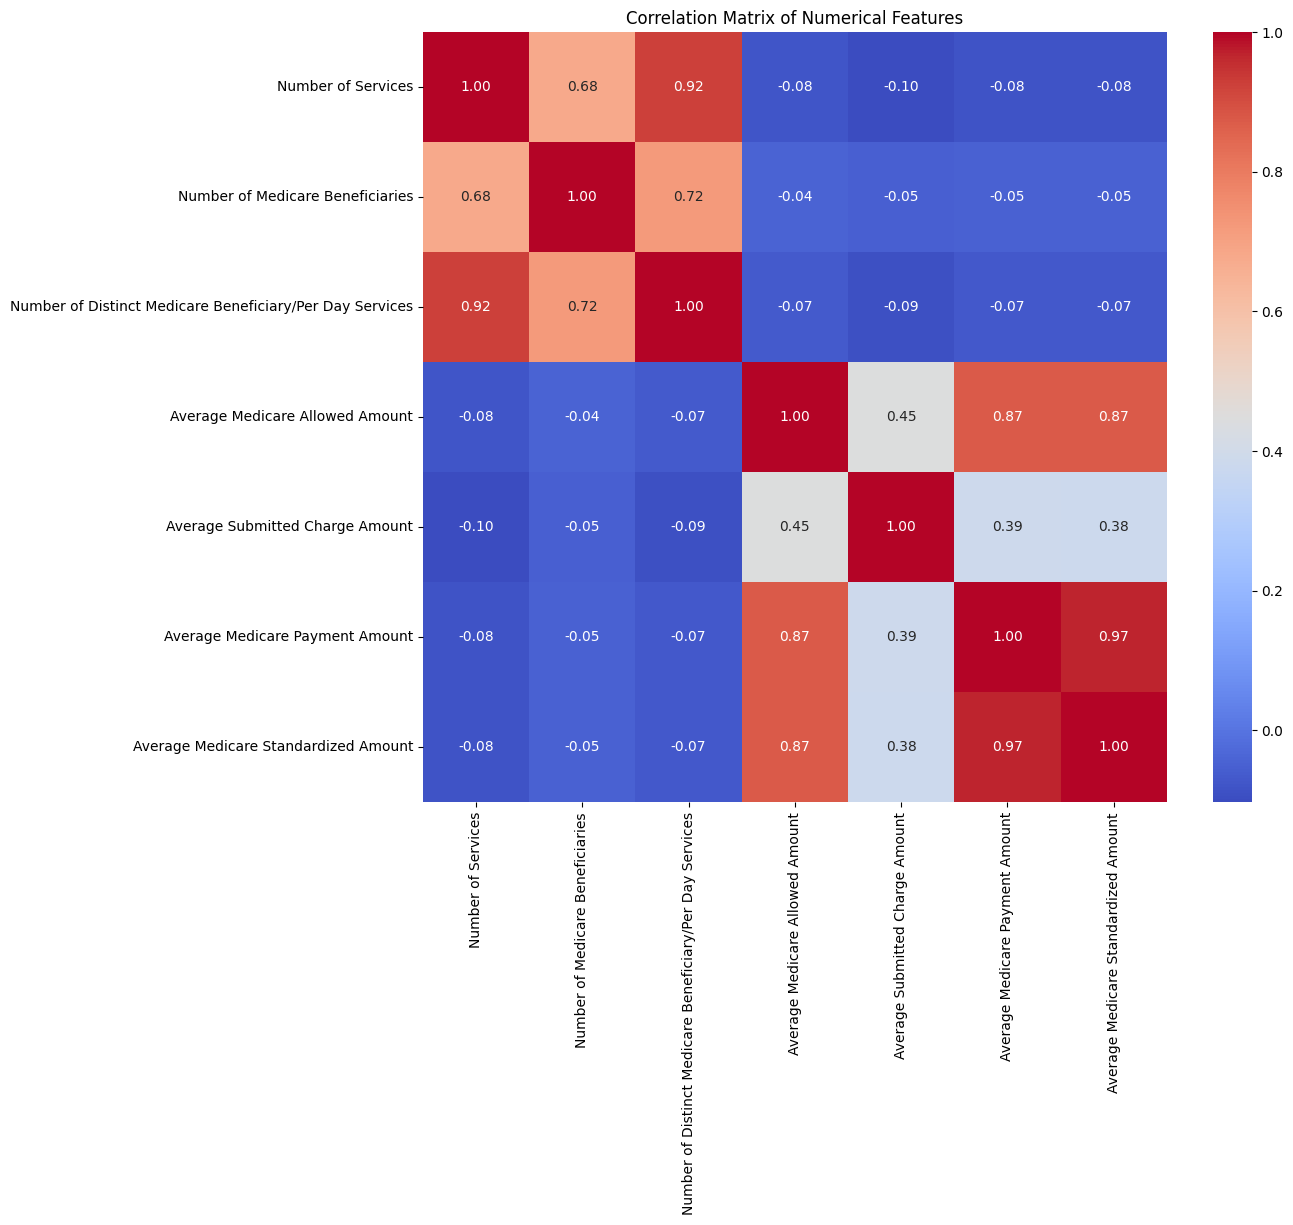

In [26]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The heatmap shows strong positive correlations between:

- Submitted Charge and Allowed Amount
- Payment Amount and Standardized Amount

In [27]:
def get_top_correlated_pairs(correlation_matrix, threshold=0.7):
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
    return corr_pairs

top_correlated_pairs = get_top_correlated_pairs(correlation_matrix, threshold=0.7)
print("Top Correlated Pairs:", top_correlated_pairs)


Top Correlated Pairs: [('Number of Distinct Medicare Beneficiary/Per Day Services', 'Number of Services'), ('Number of Distinct Medicare Beneficiary/Per Day Services', 'Number of Medicare Beneficiaries'), ('Average Medicare Payment Amount', 'Average Medicare Allowed Amount'), ('Average Medicare Standardized Amount', 'Average Medicare Allowed Amount'), ('Average Medicare Standardized Amount', 'Average Medicare Payment Amount')]


### Scatter Plot Insights: Anomalous vs. Normal Providers

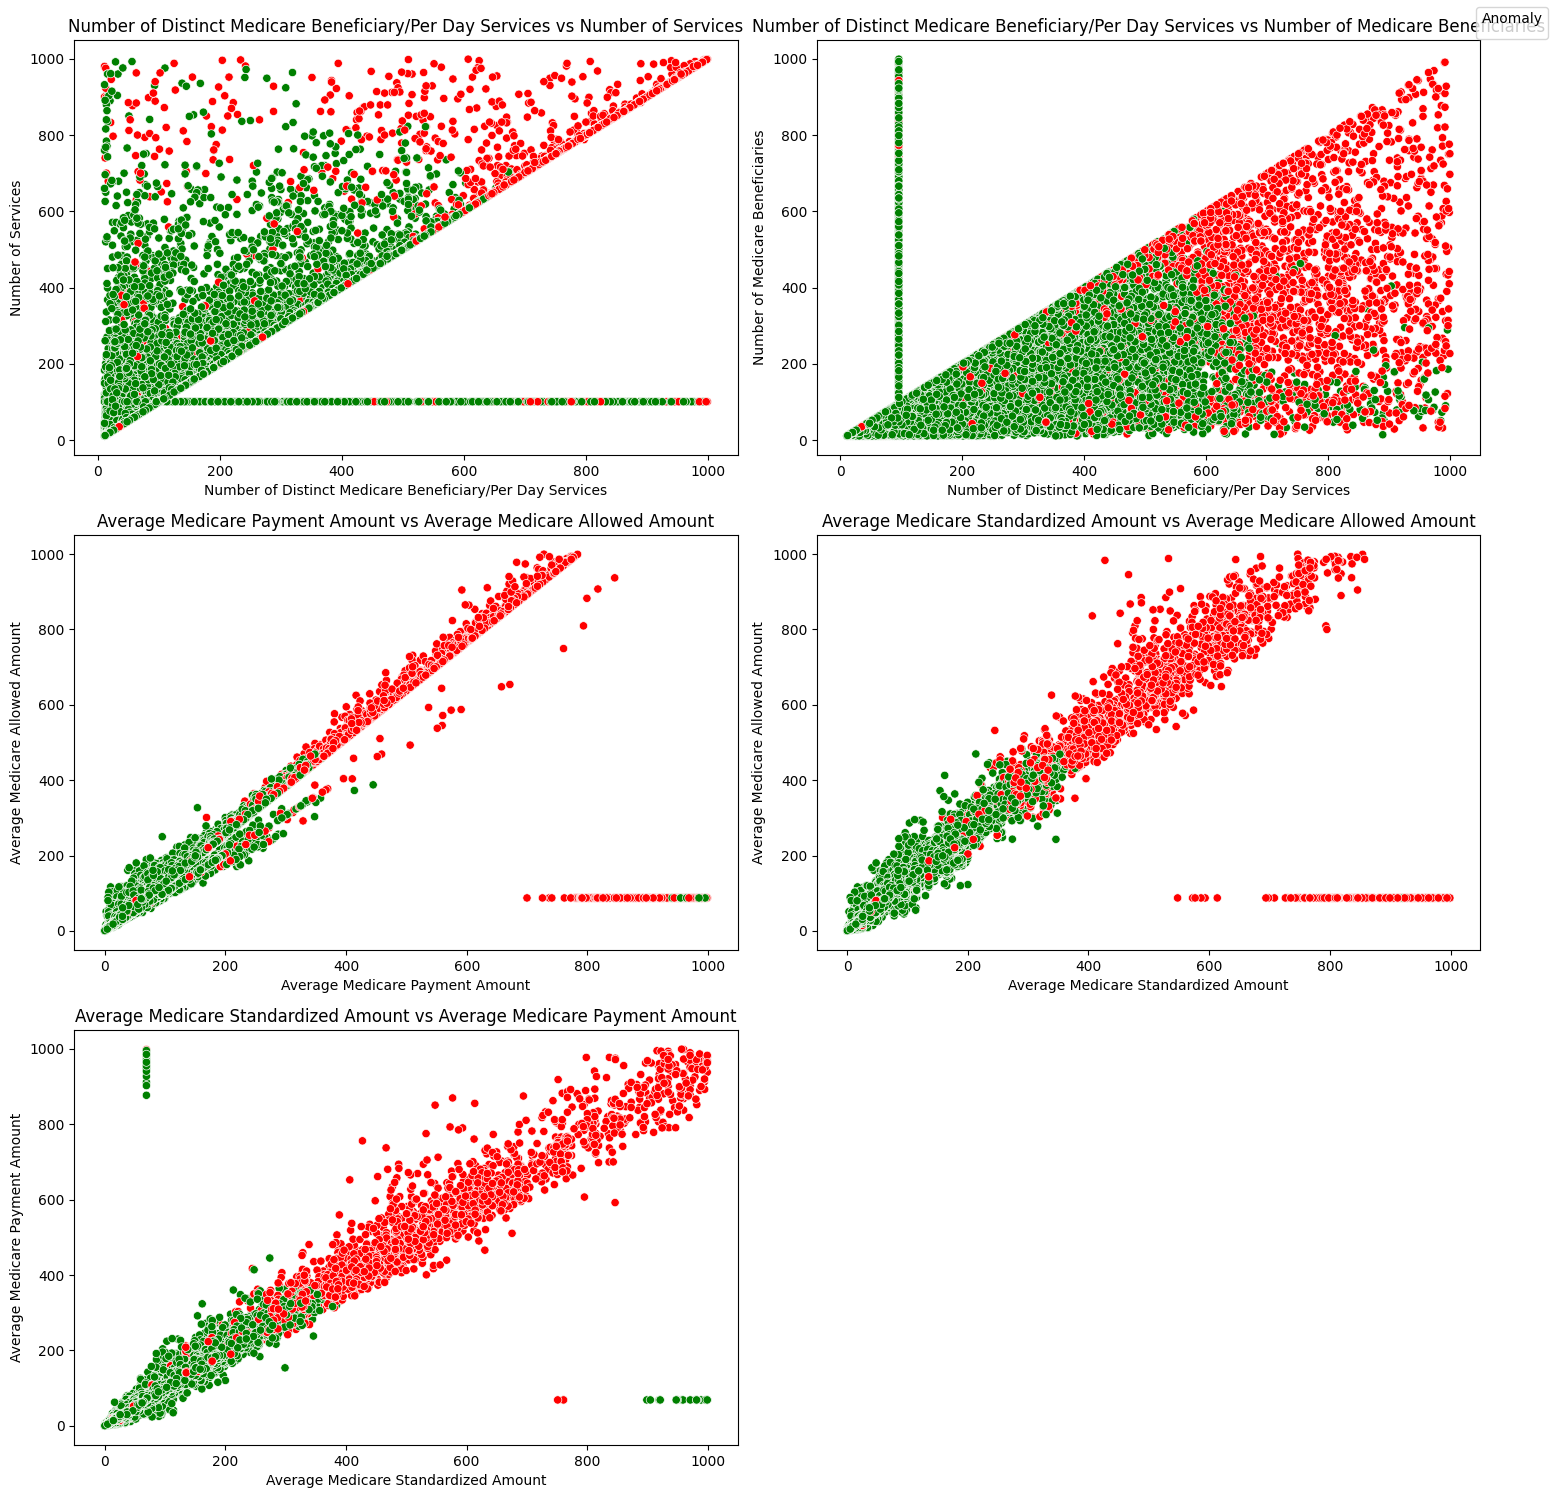

In [28]:
df['Anomaly_Bool'] = df['Anomaly'].apply(lambda x: x == -1)

def plot_scatter_plots(df, feature_pairs, anomaly_column='Anomaly_Bool', palette=None):
    if palette is None:
        palette = {True: 'red', False: 'green'}

    num_pairs = len(feature_pairs)
    nrows = (num_pairs + 1) // 2
    ncols = 2

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

    for i, (x_feature, y_feature) in enumerate(feature_pairs):
        row = i // ncols
        col_index = i % ncols

        sns.scatterplot(x=df[x_feature], y=df[y_feature], hue=df[anomaly_column].map({True: 'Anomaly', False: 'Normal'}),
                        palette=palette, ax=axes[row, col_index], legend=False)

        axes[row, col_index].set_title(f'{x_feature} vs {y_feature}')
        axes[row, col_index].set_xlabel(x_feature)
        axes[row, col_index].set_ylabel(y_feature)

        if i == 0:
            handles, labels = axes[row, col_index].get_legend_handles_labels()
            fig.legend(handles, labels, title='Anomaly', loc='upper right')

    if num_pairs % ncols != 0:
        for j in range(num_pairs % ncols, ncols):
            fig.delaxes(axes[-1, j])

    plt.tight_layout()
    plt.show()

custom_palette = {'Anomaly': 'red', 'Normal': 'green'}
plot_scatter_plots(df, top_correlated_pairs, palette=custom_palette)

**Distinct Services vs. Total Services**

- **Observation**: Most providers cluster in a predictable band of service delivery, but anomalies stand apart with unusually high or low service rates.
- **Interpretation**: These may reflect excessive or unusually concentrated service patterns—common flags for audit reviews.

**Distinct Services vs. Medicare Beneficiaries**
- **Observation**: Normal records show a stable relationship, while anomalies are dispersed—some serving very few patients but providing intense services.
- **Interpretation**: Indicates potential over-treatment or billing concentration in specific cases.

**Payment Amount vs. Allowed Amount**
- **Observation**: While normal points align closely (as expected from policy norms), anomalies break this trend—either receiving disproportionately high payments or submitting inflated claims.
- **Interpretation**: These deviations could point to mismatches in billing behavior or reimbursement anomalies.

**Standardized Amount vs. Allowed Amount**
- **Observation**: Most data points fall along a predictable curve, but anomalies veer off—receiving standardized adjustments that don't align with typical allowed amounts.
- **Interpretation**: This might suggest geographic pricing misalignments or suspicious claim structuring.

**Standardized Amount vs. Payment Amount**
- **Observation**: Anomalies show wider dispersion and separation from the payment-amount density of normal data.
- **Interpretation**: This uncovers potential policy exceptions, aggressive billing, or inconsistent coding practices.